<a href="https://colab.research.google.com/github/krisibraynova01/HISB/blob/main/Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Импортиране на необходимите пакети**

In [ ]:
import pandas as pd
import missingno as msno
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.dates import DateFormatter, MonthLocator

**2. Зареждане на данните в средата за изпълнение на Python**

In [ ]:
df = pd.read_csv('marketing_campaign.csv', sep = '\t')

**3.Обобщение на данните**

**3.1. Проверка на структурата и съдържанието на данните чрез функциите head() и tail()**

In [ ]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [ ]:
df.tail()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[5 rows x 29 columns]

**3.2. Размер на набора от данни**

In [ ]:
df.shape

(2240, 29)

**3.3. Проверка на типа на данните**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

**3.4. Обобщена статистика за всяка една от променливите от набора от данни**

In [ ]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [ ]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 113.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 120.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━


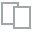
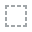
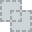
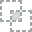
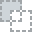
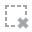
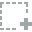
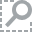
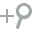
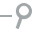
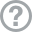
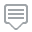
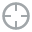
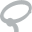
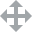
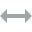
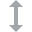
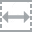
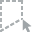
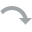
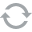
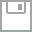
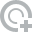
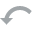
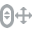
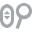
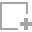
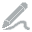
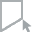
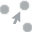
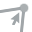
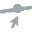

In [ ]:
from dataprep.eda import plot, plot_correlation, create_report, plot_missing
plot(df)

**3.5. Изследване на категориални променливи**

In [ ]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [ ]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
df['Complain'].value_counts()

0    2219
1      21
Name: Complain, dtype: int64

**4. Предварителна обработка на данни**

**4.1. Почистване на данни**

**4.1.1. Обработка на липсващи стойности**

In [ ]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<Axes: >

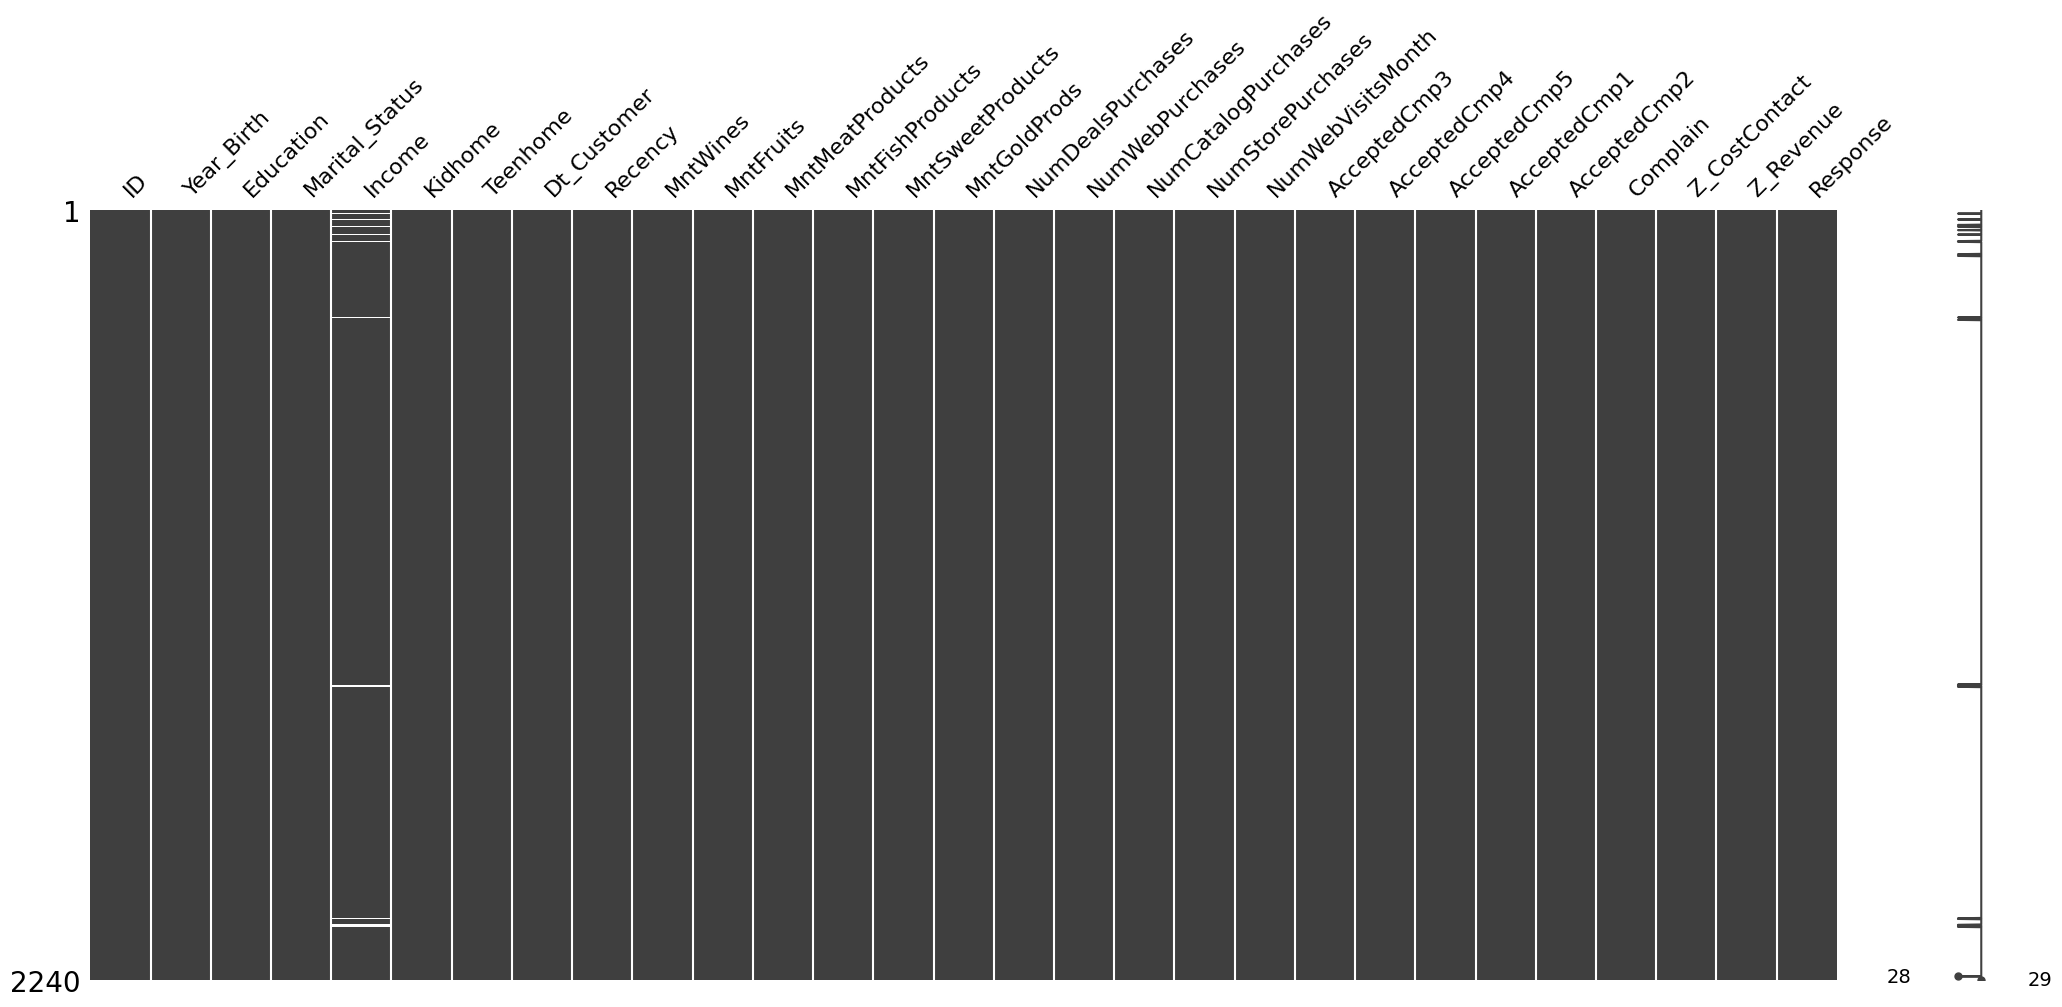

In [ ]:
msno.matrix(df)

In [ ]:
total_cells = df.shape[0]
total_missing = df.isna().sum()
percent_missing = (total_missing/total_cells)*100
print(f"{round(percent_missing,2)}")

ID                     0.00
Year_Birth             0.00
Education              0.00
Marital_Status         0.00
Income                 1.07
Kidhome                0.00
Teenhome               0.00
Dt_Customer            0.00
Recency                0.00
MntWines               0.00
MntFruits              0.00
MntMeatProducts        0.00
MntFishProducts        0.00
MntSweetProducts       0.00
MntGoldProds           0.00
NumDealsPurchases      0.00
NumWebPurchases        0.00
NumCatalogPurchases    0.00
NumStorePurchases      0.00
NumWebVisitsMonth      0.00
AcceptedCmp3           0.00
AcceptedCmp4           0.00
AcceptedCmp5           0.00
AcceptedCmp1           0.00
AcceptedCmp2           0.00
Complain               0.00
Z_CostContact          0.00
Z_Revenue              0.00
Response               0.00
dtype: float64


In [ ]:
df[df['Income'].isna()]

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
312    2437        1989  Graduation        Married     NaN        0         0   
319    2863        1970  Graduation         Single     NaN        1         2   
1379  10475        1970      Master       Together     NaN        0         1   
1382   2902        1958  Graduation       Together     NaN        1         1   
1383   4345        1964    2n Cycle         Single     NaN        1         1   
1386   3769        1972         PhD       Together     NaN        1         0   
2059   7187        1969      Master       Together     NaN        1         1   
2061   1612        1981         PhD         Single     NaN        1         0   
2078   5079        1971  Graduation        Married     NaN        1         1   
2079  10339        1954      Master       Together     NaN        0         1   
2081   3117        1955  Graduation         Single     NaN        0         1   
2084   5250        1943      Master          Widow     NaN        0         0   
2228   8720        1978    2n Cycle       Together     NaN        0         0   

     Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
10    15-11-2013       11         5  ...                  7             0   
27    20-02-2013       19         5  ...                  1             0   
43    05-11-2013       80        81  ...                  2             0   
48    01-01-2014       96        48  ...                  6             0   
58    17-06-2013       57        11  ...                  6             0   
71    14-09-2012       25        25  ...                  8             0   
90    19-11-2012        4       230  ...                  9             0   
91    27-05-2014       45         7  ...                  7             0   
92    23-11-2013       87       445  ...                  1             0   
128   11-07-2013       23       352  ...                  6             0   
133   11-08-2013       96       231  ...                  4             0   
312   03-06-2013       69       861  ...                  3             0   
319   23-08-2013       67       738  ...                  7             0   
1379  01-04-2013       39       187  ...                  5             0   
1382  03-09-2012       87        19  ...                  5             0   
1383  12-01-2014       49         5  ...                  7             0   
1386  02-03-2014       17        25  ...                  7             0   
2059  18-05-2013       52       375  ...                  3             0   
2061  31-05-2013       82        23  ...                  6             0   
2078  03-03-2013       82        71  ...                  8             0   
2079  23-06-2013       83       161  ...                  6             0   
2081  18-10-2013       95       264  ...                  7             0   
2084  30-10-2013       75       532  ...                  1             0   
2228  12-08-2012       53        32  ...                  0             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedC

**Вземане на решение коя техника за импутация на липсващи стойности да бъде използвана**

In [ ]:
import plotly.express as px
variable = 'Income'
fig = px.box(df[variable]).update_layout(font_size=12
                                           ,title=f'BoxPlot of {variable}'
                                           ,template='presentation'
                                           ,yaxis = {'title':''}
                                           ,xaxis = {'title':''}
                                           ,width = 500
                                           ,height = 600)

ref_point = np.max(df[variable])
fig.add_shape(type="rect"
    , x0=-0.05
    , y0=ref_point + 10000
    , x1=0.05
    , y1=ref_point - 10000
    ,line=dict(color="red")
)

fig.show()

<ipython-input-19-332167f08bea>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Income', ylabel='Density'>

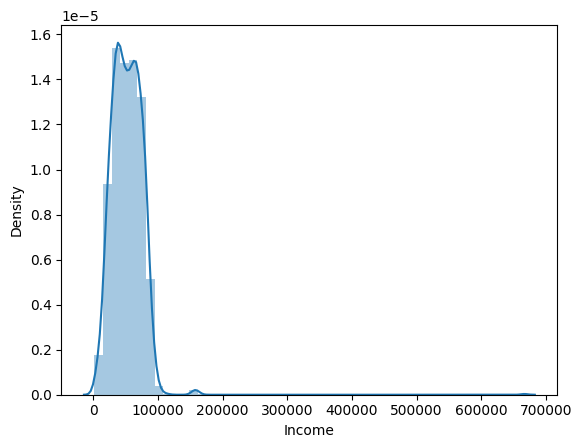

In [ ]:
sns.distplot(df['Income'])

**Заместване на липсващите стойности с median**

In [ ]:
df['Income'] = df['Income'].fillna(df['Income'].median())

In [ ]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

**Дублирани редове**

In [ ]:
df[df.duplicated()]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]

**Уникални стойности**

In [ ]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

**4.2. Обработка на извънредни стойности**

**Генериране на кутийни графики за идентифициране на извънредни стойности**

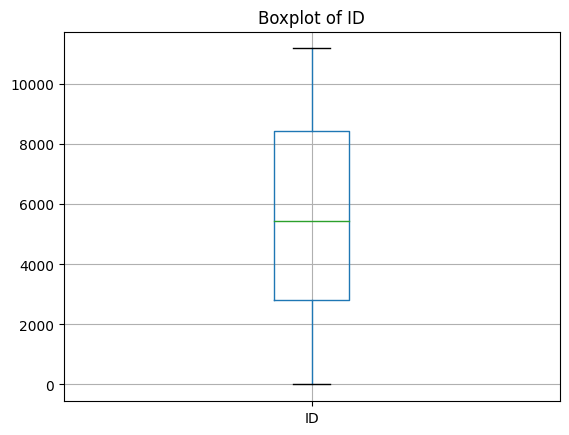

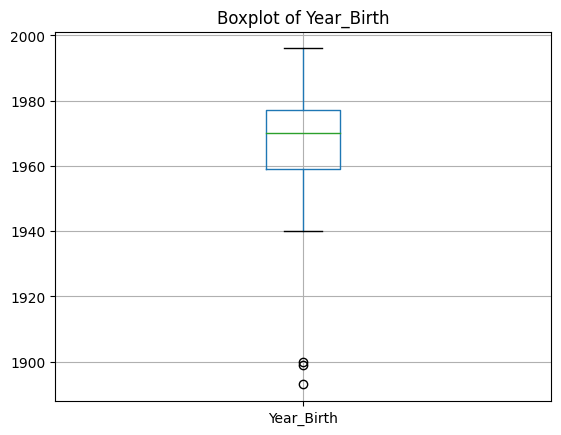

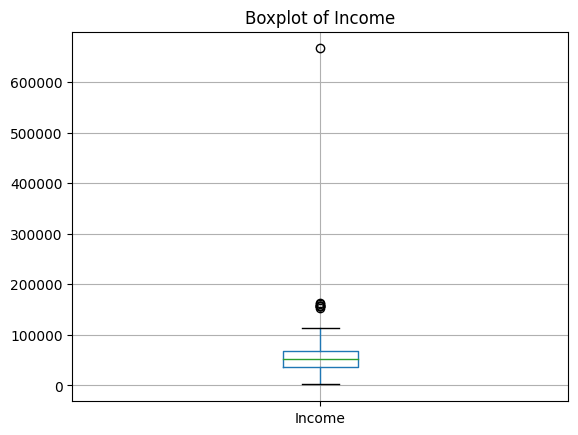

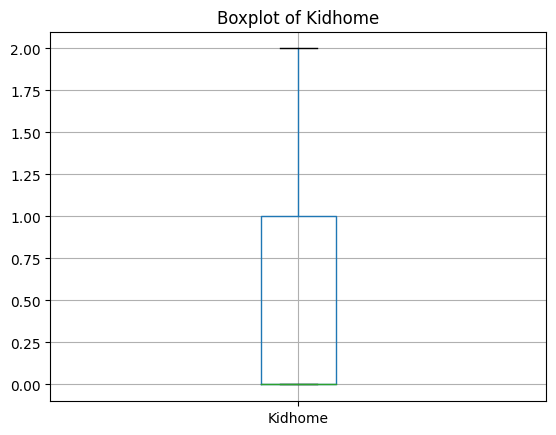

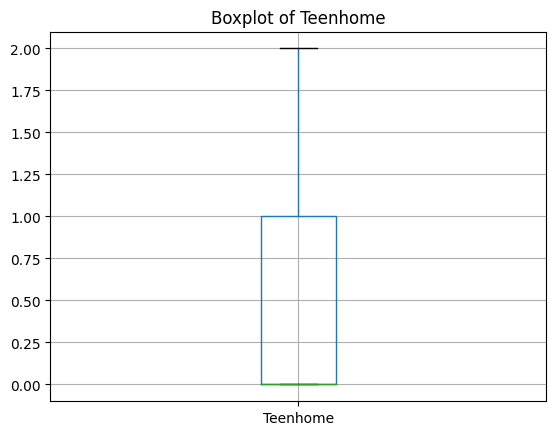

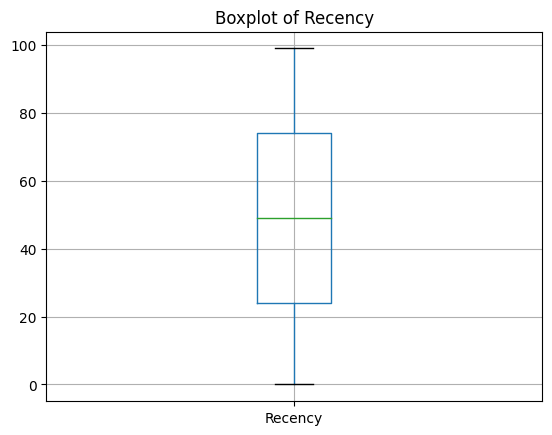

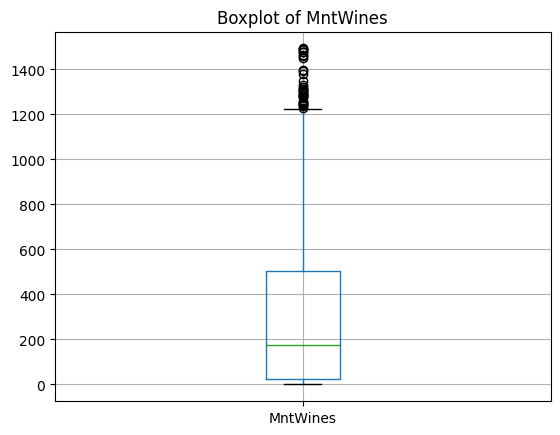

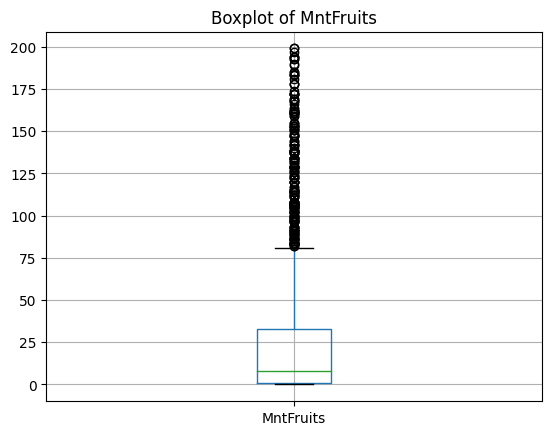

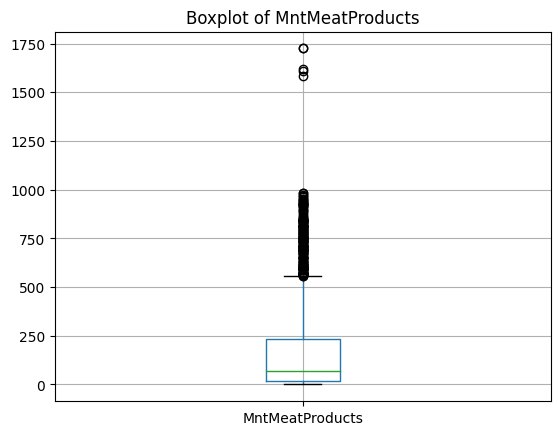

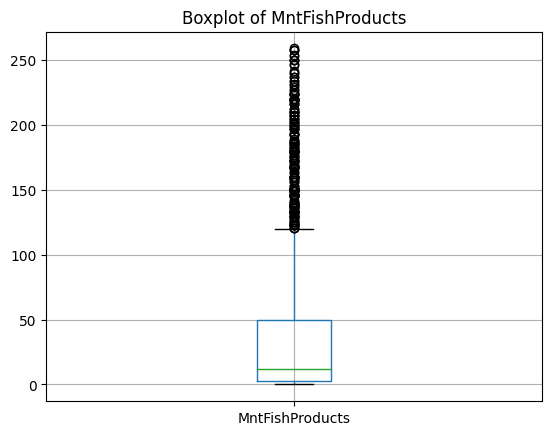

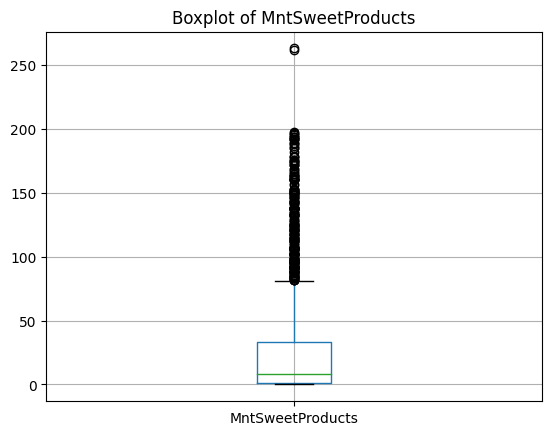

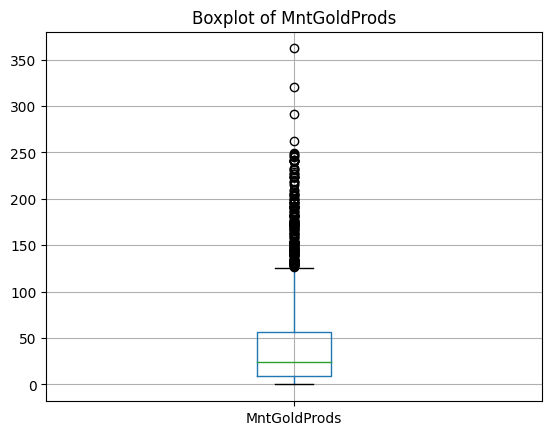

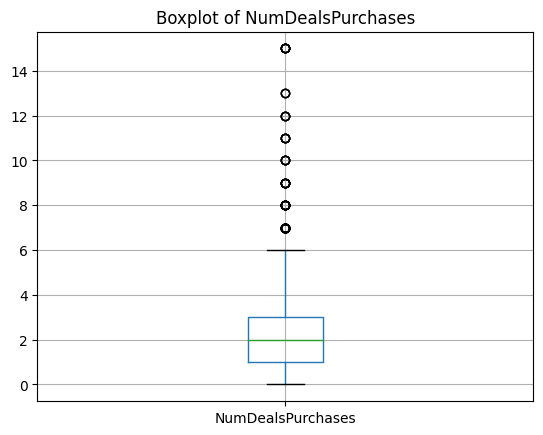

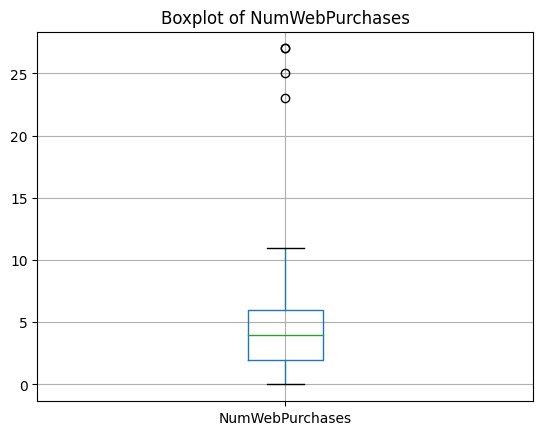

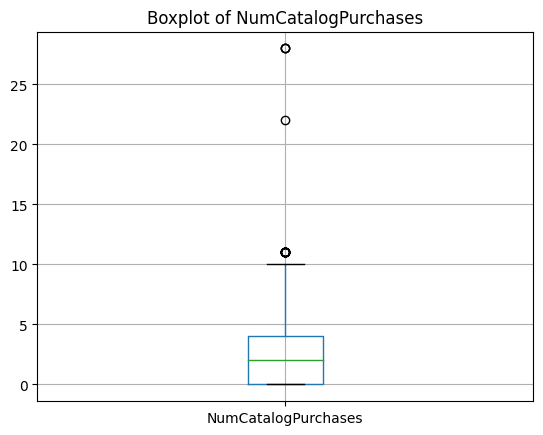

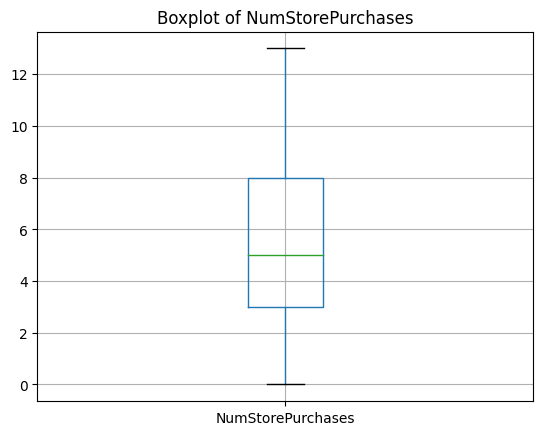

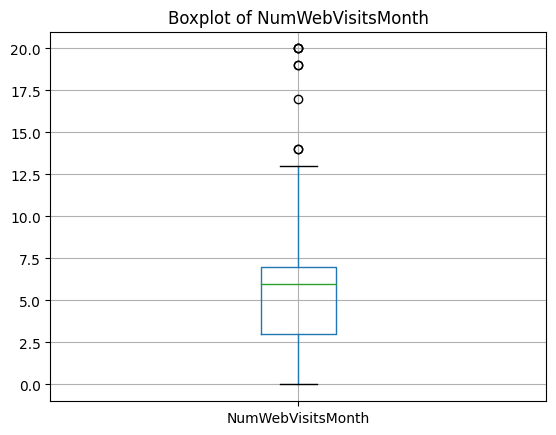

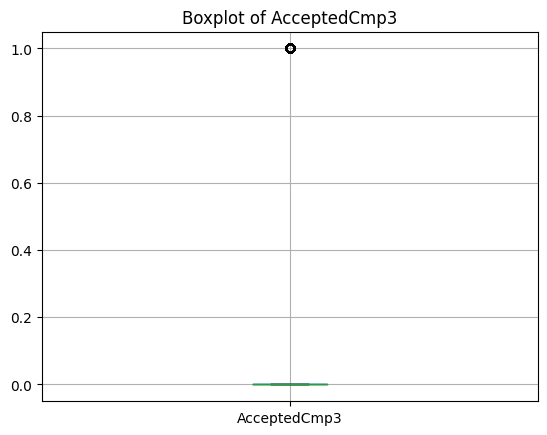

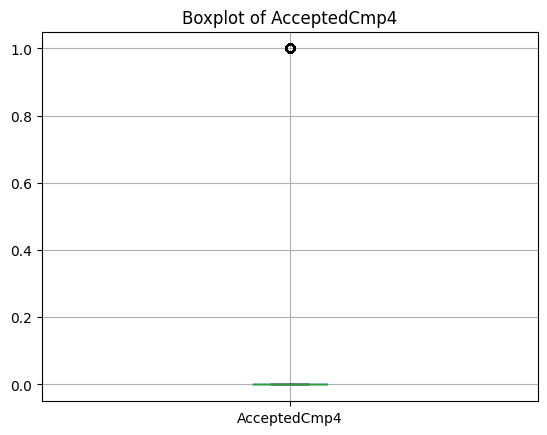

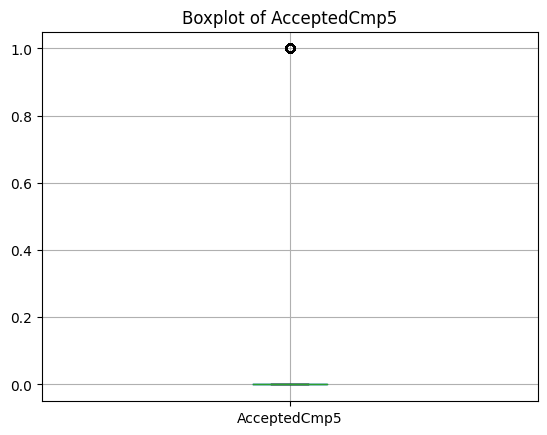

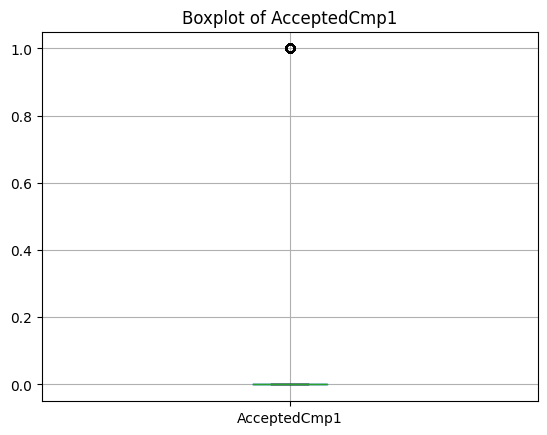

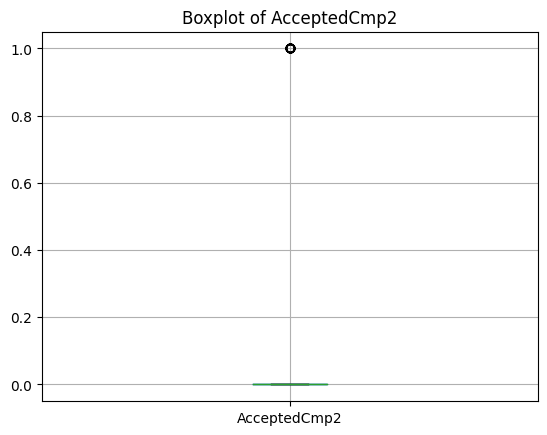

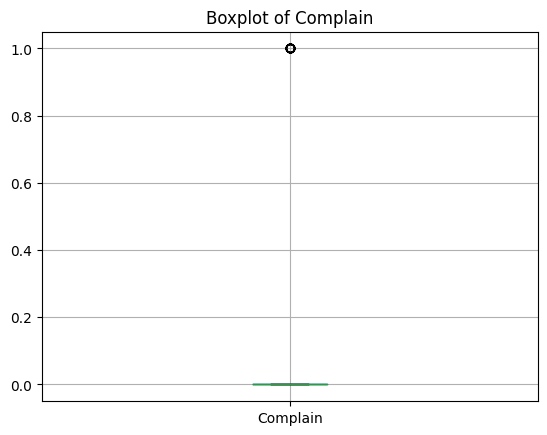

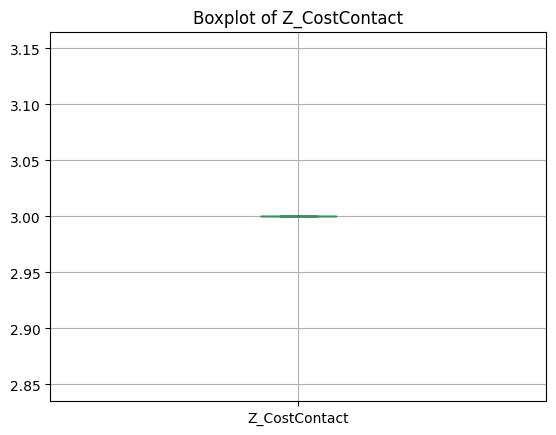

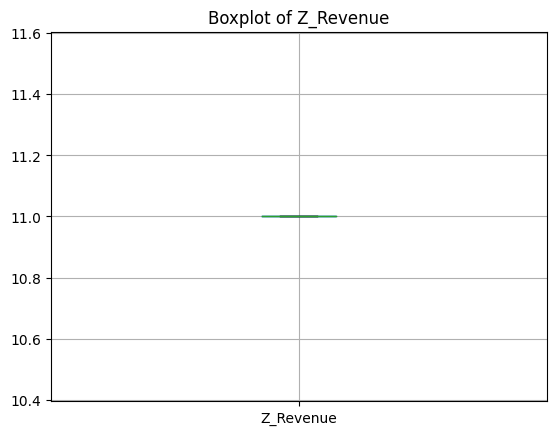

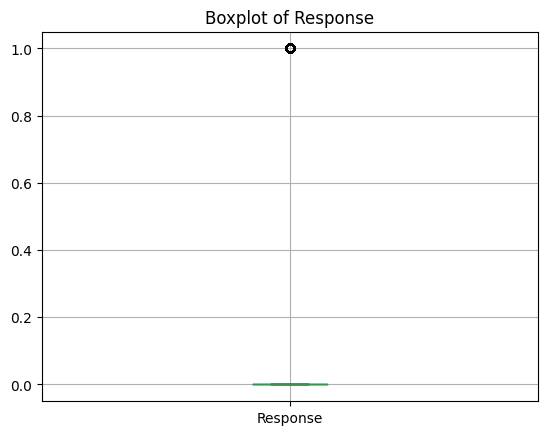

In [ ]:
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.figure()
        df.boxplot(column=column)
        plt.title(f"Boxplot of {column}")
        plt.show()

**Създаване на функция за идентифициране на извънредни стойности и връщане на редовете, които са такива**

In [ ]:
def find_outliers(data):
    outliers = {}

    for column in data.columns:
        if pd.api.types.is_numeric_dtype(data[column]):

            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)

            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            lower_outliers = data[data[column] < lower_bound]
            upper_outliers = data[data[column] > upper_bound]


            outliers[column] = {'lower': lower_outliers, 'upper': upper_outliers}

    return outliers

In [ ]:
outliers = find_outliers(df)

for column, values in outliers.items():
    print(f"Variable: {column}")
    print("Lower outliers:")
    print(values['lower'])
    print("\nUpper outliers:")
    print(values['upper'])
    print("-------------------------------------")

Variable: ID
Lower outliers:
Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]

Upper outliers:
Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]
-------------------------------------
Variable: Year_Bir

**Премахване на отклоненията от колоните "Year_Birth" и най - голямото отклонение от "Income"**

In [ ]:
quartile1 = df['Year_Birth'].quantile(0.25)
quartile3 = df['Year_Birth'].quantile(0.75)
interquantile_range = quartile3 - quartile1
low_outlier = quartile1 - 1.5 * interquantile_range
low_out = df[df['Year_Birth'] < low_outlier]
low_out

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192   7829        1900  2n Cycle       Divorced  36640.0        1         0   
239  11004        1893  2n Cycle         Single  60182.0        0         1   
339   1150        1899       PhD       Together  83532.0        0         0   

    Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
192  26-09-2013       99        15  ...                  5             0   
239  17-05-2014       23         8  ...                  4             0   
339  26-09-2013       36       755  ...                  1             0   

     AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
192             0             0             0             0         1   
239             0             0             0             0         0   
339             0             1             0             0         0   

     Z_CostContact  Z_Revenue  Response  
192              3         11         0  
239              3         11         0  
339              3         11         0  

[3 rows x 29 columns]

In [ ]:
df = df.drop(low_out.index)

In [ ]:
quartile1 = df['Income'].quantile(0.25)
quartile3 = df['Income'].quantile(0.75)
interquantile_range = quartile3 - quartile1
up_outlier = quartile3 + 1.5 * interquantile_range

In [ ]:
upper_out = df[df['Income'] > up_outlier].tail(1)
upper_out

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
2233  9432        1977  Graduation       Together  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2233         0  02-06-2013       23         9  ...                  6   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2233             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2233         0              3         11         0  

[1 rows x 29 columns]

In [ ]:
df = df.drop(upper_out.index)

In [ ]:
df[['Year_Birth', 'Income']].describe()

Year_Birth         Income
count  2236.000000    2236.000000
mean   1968.898032   51952.614043
std      11.703281   21411.466851
min    1940.000000    1730.000000
25%    1959.000000   35502.500000
50%    1970.000000   51381.500000
75%    1977.000000   68275.750000
max    1996.000000  162397.000000

**5. EDA (Exploratory Data Analysis)
Проучвателен анализ на данни**

**5.1.Разпреление на данните за колоната "Income"**

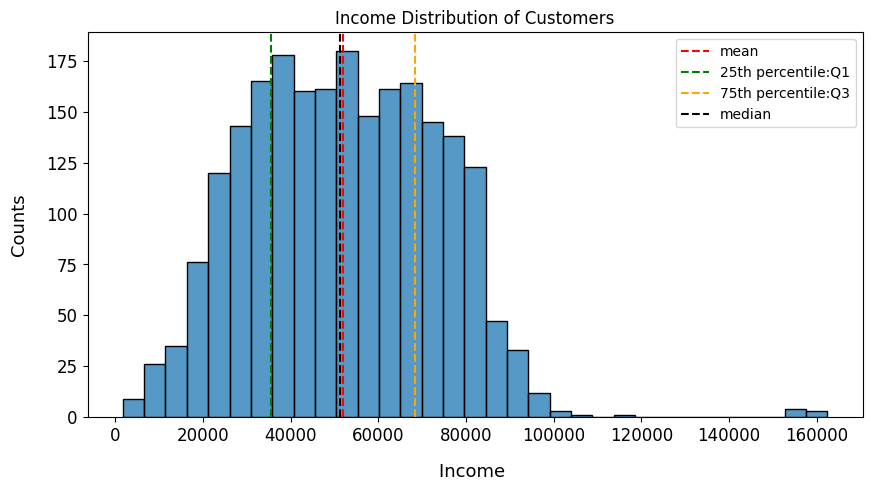

In [ ]:
plt.figure(figsize=(10,5))
distr_of_age = sns.histplot(data = df, x = df['Income'])
distr_of_age.set(title = "Income Distribution of Customers");
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('Income ', fontsize=13, labelpad=13)
plt.ylabel('Counts', fontsize=13, labelpad=13)
plt.axvline(x=np.mean(df['Income']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df['Income'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df['Income'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.axvline(x=np.median(df['Income']), c='black', ls='--', label='median')
plt.legend()

In [ ]:
df['Income'].describe()

count      2236.000000
mean      51952.614043
std       21411.466851
min        1730.000000
25%       35502.500000
50%       51381.500000
75%       68275.750000
max      162397.000000
Name: Income, dtype: float64

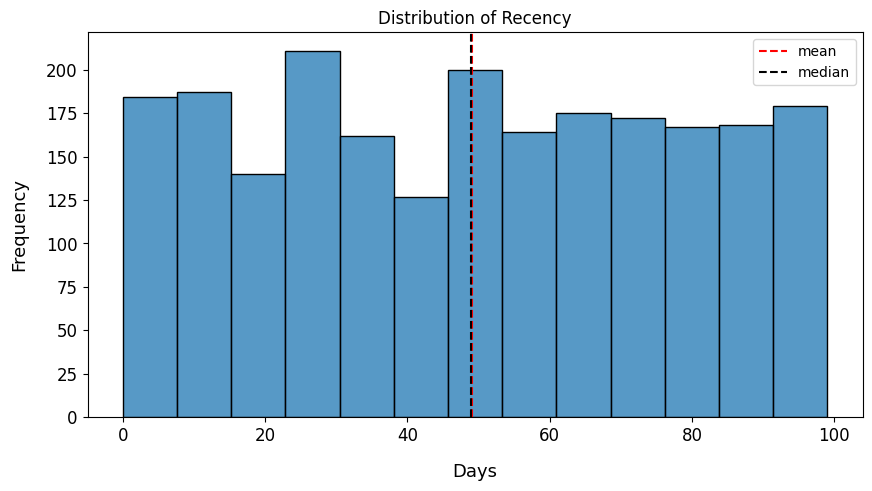

In [ ]:
plt.figure(figsize=(10, 5))
distr_of_age = sns.histplot(data=df, x=df['Recency'])
distr_of_age.set(title="Distribution of Recency")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Days', fontsize=13, labelpad=13)
plt.ylabel('Frequency', fontsize=13, labelpad=13)
plt.axvline(x=np.mean(df['Recency']), c='red', ls='--', label='mean')
plt.axvline(x=np.median(df['Recency']), c='black', ls='--', label='median')
plt.legend()

plt.show()

In [ ]:
df['Recency'].describe()

count    2236.000000
mean       49.116279
std        28.957284
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

In [ ]:
df[df['Recency'].isin(list(range(10,20)))]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
5     7446        1967      Master       Together  62513.0        0         1   
8     4855        1974         PhD       Together  30351.0        1         0   
10    1994        1983  Graduation        Married  51381.5        1         0   
27    5255        1986  Graduation         Single  51381.5        1         0   
44    2139        1975      Master        Married   7500.0        1         0   
...    ...         ...         ...            ...      ...      ...       ...   
2198  2632        1954  Graduation        Married  50501.0        1         1   
2204  1876        1990  Graduation        Married  18929.0        0         0   
2206  1092        1980  Graduation        Married  61014.0        0         1   
2214  9303        1976  Graduation        Married   5305.0        0         1   
2221  7366        1982      Master         Single  75777.0        0         0   

     Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
5     09-09-2013       16       520  ...                  6             0   
8     06-06-2013       19        14  ...                  9             0   
10    15-11-2013       11         5  ...                  7             0   
27    20-02-2013       19         5  ...                  1             0   
44    02-10-2013       19         3  ...                  5             0   
...          ...      ...       ...  ...                ...           ...   
2198  18-06-2013       10       297  ...                  6             1   
2204  16-02-2013       15        32  ...                  6             0   
2206  11-08-2012       17       269  ...                  7             0   
2214  30-07-2013       12        12  ...                 13             0   
2221  04-07-2013       12       712  ...                  1             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
5                0             0             0             0         0   
8                0             0             0             0         0   
10               0             0             0             0         0   
27               0             0             0             0         0   
44               0             0             0             0         0   
...            ...           ...           ...           ...       ...   
2198             0             0             0             0         0   
2204             0             0             0             0         0   
2206             0             0             0             0         0   
2214             0             0             0             0         0   
2221             1             1             0             0         0   

      Z_CostContact  Z_Revenue  Response  
5                 3         11         0  
8                 3         11         1  
10                3         11         0  
27                3         11         0  
44                3         11         0  
...             ...        ...       ...  
2198              3         11         1  
2204              3         11         0  
2206              3         11         0  
2214              3         11         0  
2221              3         11         1  

[223 rows x 29 columns]

**5.2. Инженеринг на функции и прозрения чрез визуализация на данните**

**5.2.1. Clients**

**Създаване на променлива "Age"**

In [ ]:
df['Age'] = 2014 - df['Year_Birth']

Text(0, 0.5, 'Counts')

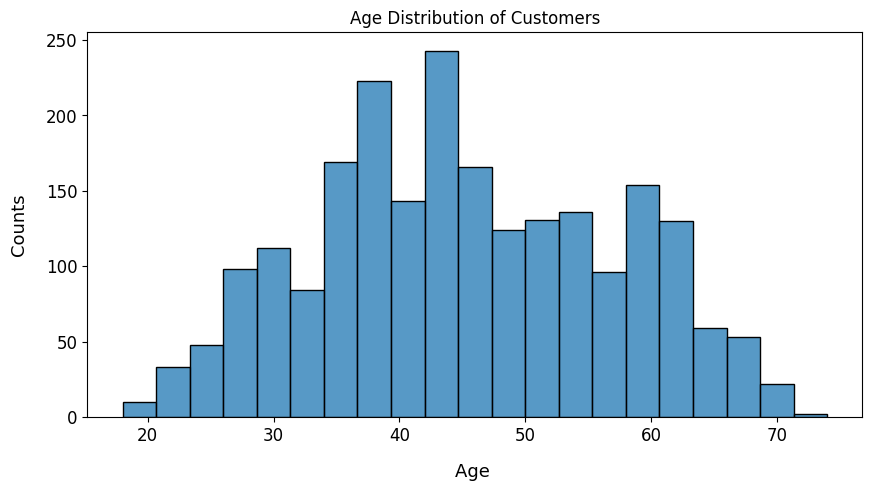

In [ ]:
plt.figure(figsize=(10,5))
distr_of_age = sns.histplot(data = df, x = df['Age'])
distr_of_age.set(title = "Age Distribution of Customers");
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('Age ', fontsize=13, labelpad=13)
plt.ylabel('Counts', fontsize=13, labelpad=13)

In [ ]:
px.histogram(df['Year_Birth']).show()
px.histogram(df['Age']).show()

**Създаване на променливата "Age Group"**

In [ ]:
def age_group(age):
  if age >= 18 and age < 25:
    return 'Young'
  elif age >= 25 and age <= 39:
    return 'Young Adults'
  elif age >= 40 and age <= 59:
    return 'Middle-Aged Adults'
  elif age >= 60:
    return 'Old Adults'

In [ ]:
df['Age Group'] = df['Age'].apply(age_group)

Text(0.5, 1.0, 'Proportion of Age Group')

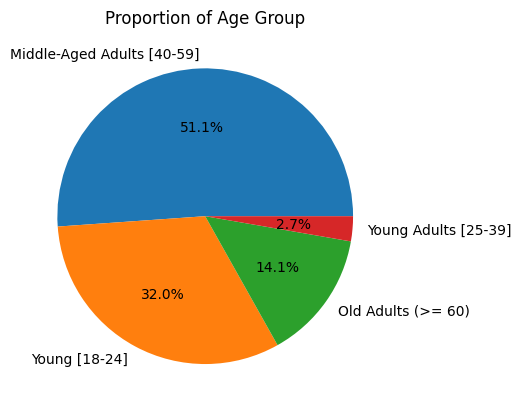

In [ ]:
mylabels = ["Middle-Aged Adults [40-59]", "Young [18-24]", "Old Adults (>= 60)", "Young Adults [25-39]"]

plt.pie(df['Age Group'].value_counts(), labels = mylabels, autopct='%1.1f%%',
        wedgeprops = {'linewidth': 3})
plt.title('Proportion of Age Group')

In [101]:
def recency_group(recency):
  if recency <= 30:
    return '0-30 days'
  elif recency > 30 and recency <= 60:
    return '30-60 days'
  elif recency > 60 and recency <= 90:
    return '60-90 days'
  else:
    return 'Over 90 days'

In [102]:
df['Recency Group'] = df['Recency'].apply(recency_group)

**Образование**

<Figure size 500x800 with 0 Axes>

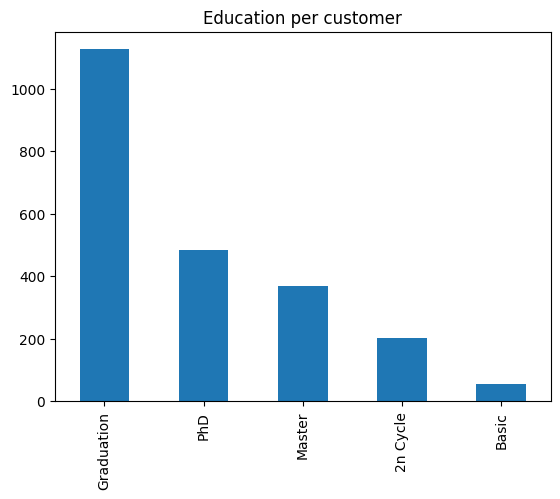

<Figure size 500x800 with 0 Axes>

In [ ]:
df['Education'].value_counts().plot(kind='bar',linewidth = 3)
plt.title('Education per customer')
plt.figure(figsize=(5,8))

In [ ]:
education_dictionary = {'Graduation': 'Higher Education',
                        'PhD': 'Higher Education',
                        'Basic': 'Basic Education',
                        '2n Cycle': 'Basic Education',
                        'Master': 'Higher Education'}

In [ ]:
df['Education'] = df['Education'].replace(to_replace = education_dictionary)

In [ ]:
df['Education'].value_counts()

Higher Education    1981
Basic Education      255
Name: Education, dtype: int64

<Figure size 500x800 with 0 Axes>

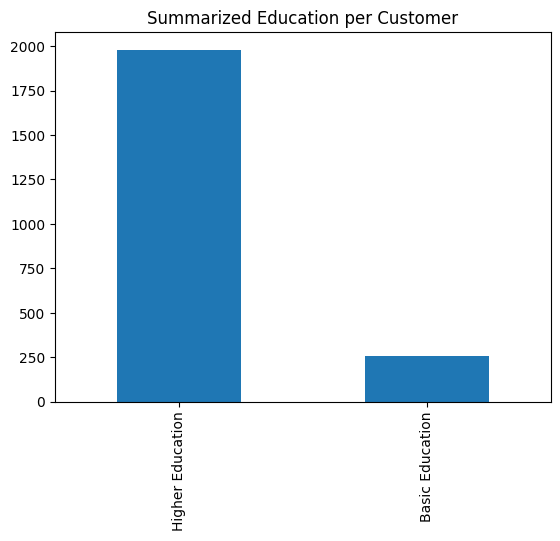

<Figure size 500x800 with 0 Axes>

In [ ]:
df['Education'].value_counts().plot(kind='bar',linewidth = 3)
plt.title('Summarized Education per Customer')
plt.figure(figsize=(5,8))

**Семейно положение**

In [ ]:
marital_status_dictionary = {'Single': 'No Relationship',
                             'Together': 'In Relationship',
                             'Married': 'In Relationship',
                             'Divorced': 'No Relationship',
                             'Widow': 'No Relationship',
                             'Alone': 'No Relationship',
                             'Absurd': 'No Relationship',
                             'YOLO': 'No Relationship'}

<Figure size 500x800 with 0 Axes>

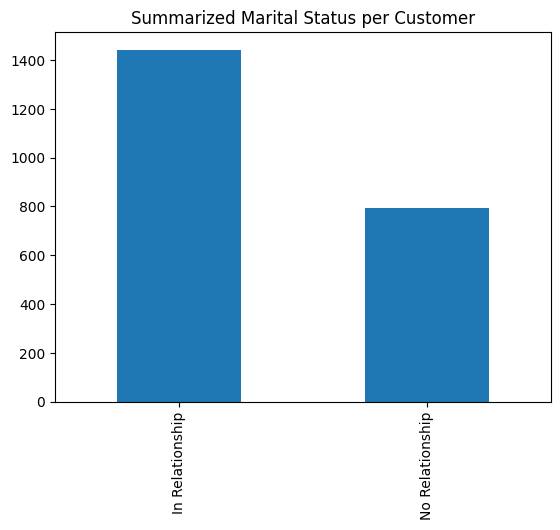

<Figure size 500x800 with 0 Axes>

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace(to_replace = marital_status_dictionary)
df['Marital_Status'].value_counts()
df['Marital_Status'].value_counts().plot(kind='bar',linewidth = 3)
plt.title('Summarized Marital Status per Customer')
plt.figure(figsize=(5,8))

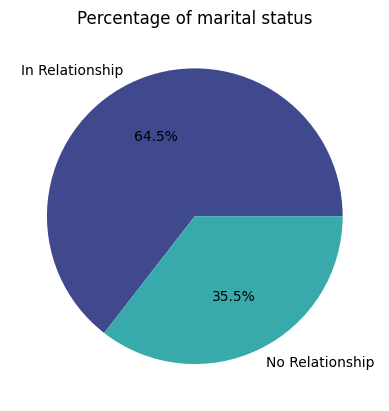

In [ ]:
colors = sns.color_palette('mako', n_colors=len(df['Marital_Status'].value_counts()))
plt.pie(df['Marital_Status'].value_counts(), labels=df['Marital_Status'].value_counts().keys(), autopct='%1.1f%%',
        wedgeprops={'linewidth': 3}, colors=colors)
plt.title('Percentage of marital status')
plt.show()

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

<ipython-input-52-5ede84e7ffb2>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [ ]:
print(max(df['Dt_Customer']))

2014-12-06 00:00:00


In [ ]:
print(min(df['Dt_Customer']))

2012-01-08 00:00:00


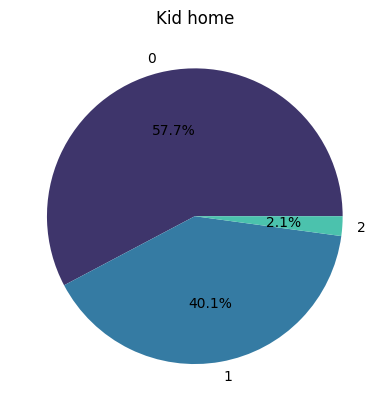

In [ ]:
colors = sns.color_palette('mako', n_colors=len(df['Kidhome'].value_counts()))
plt.pie(df['Kidhome'].value_counts(), labels=df['Kidhome'].value_counts().keys(), autopct='%1.1f%%',
        wedgeprops={'linewidth': 3}, colors=colors)
plt.title('Kid home')
plt.show()

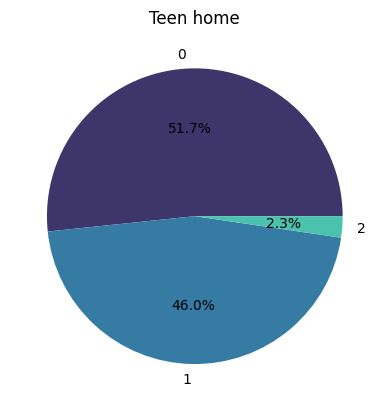

In [ ]:
colors = sns.color_palette('mako', n_colors=len(df['Teenhome'].value_counts()))
plt.pie(df['Teenhome'].value_counts(), labels=df['Teenhome'].value_counts().keys(), autopct='%1.1f%%',
        wedgeprops={'linewidth': 3}, colors=colors)
plt.title('Teen home')
plt.show()

In [ ]:
df['Children'] = df['Kidhome'] + df['Teenhome']

**5.2.2. Продукти**

In [ ]:
df['Total_Spend'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

**Зависимост между доходи и разходи**

Text(0, 0.5, 'Spendings')

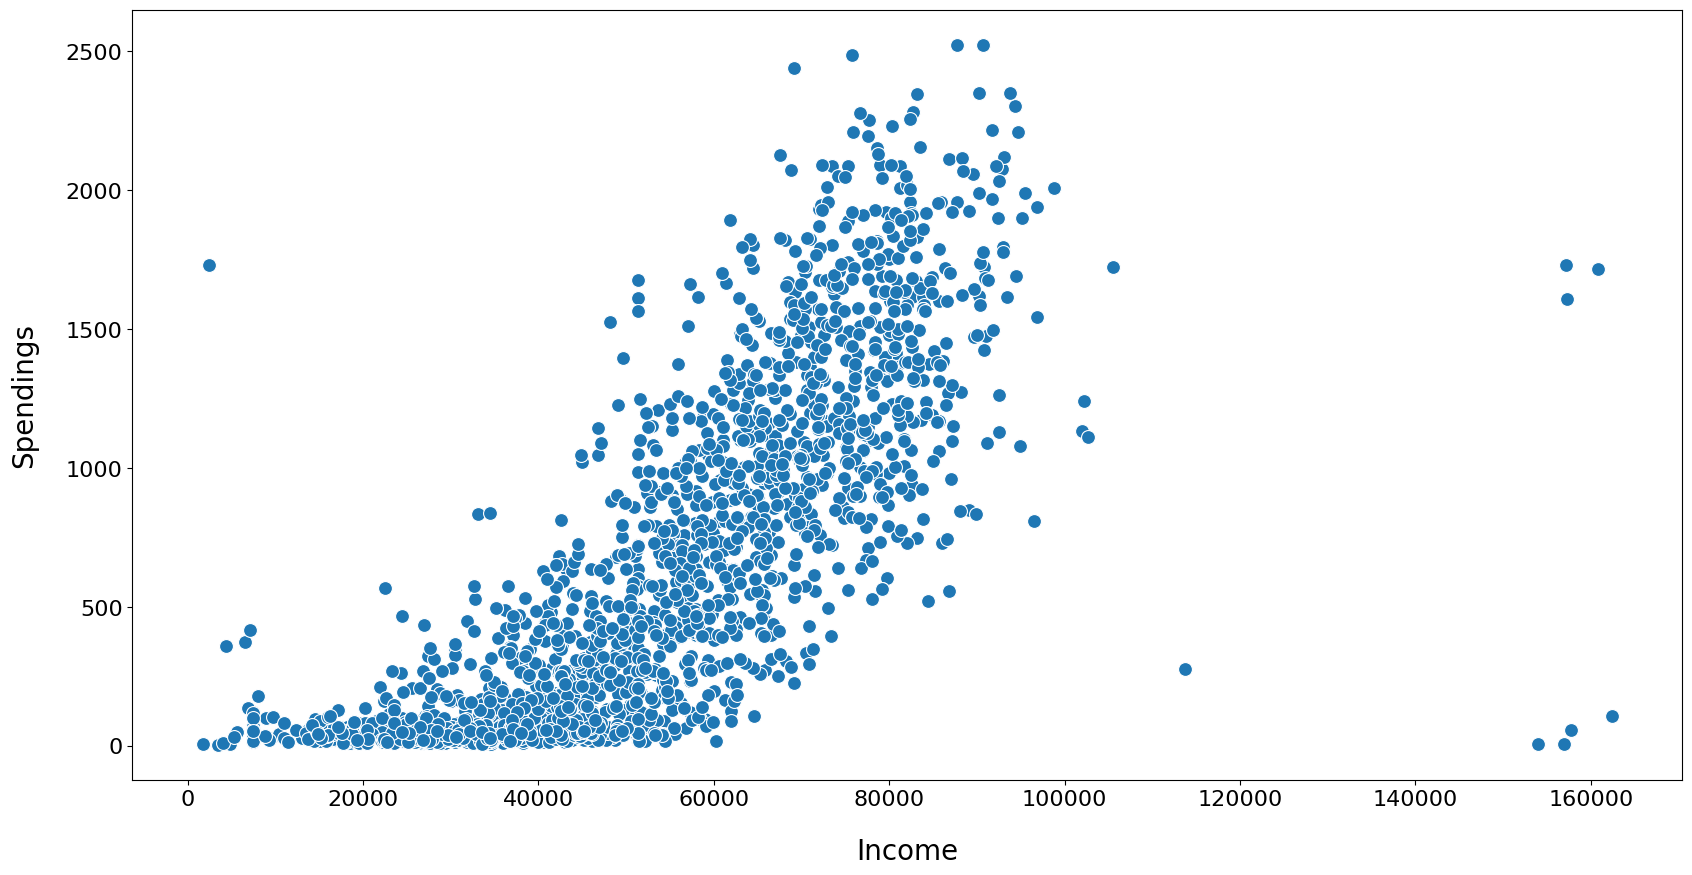

In [ ]:
plt.figure(figsize=(20,10))


sns.scatterplot(data = df, x='Income', y='Total_Spend', s=100)

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Spending', fontsize=20, labelpad=20)

Връзката е линейна. Клиентите, които получават по-високи доходи, харчат повече

Text(0, 0.5, 'Spending')

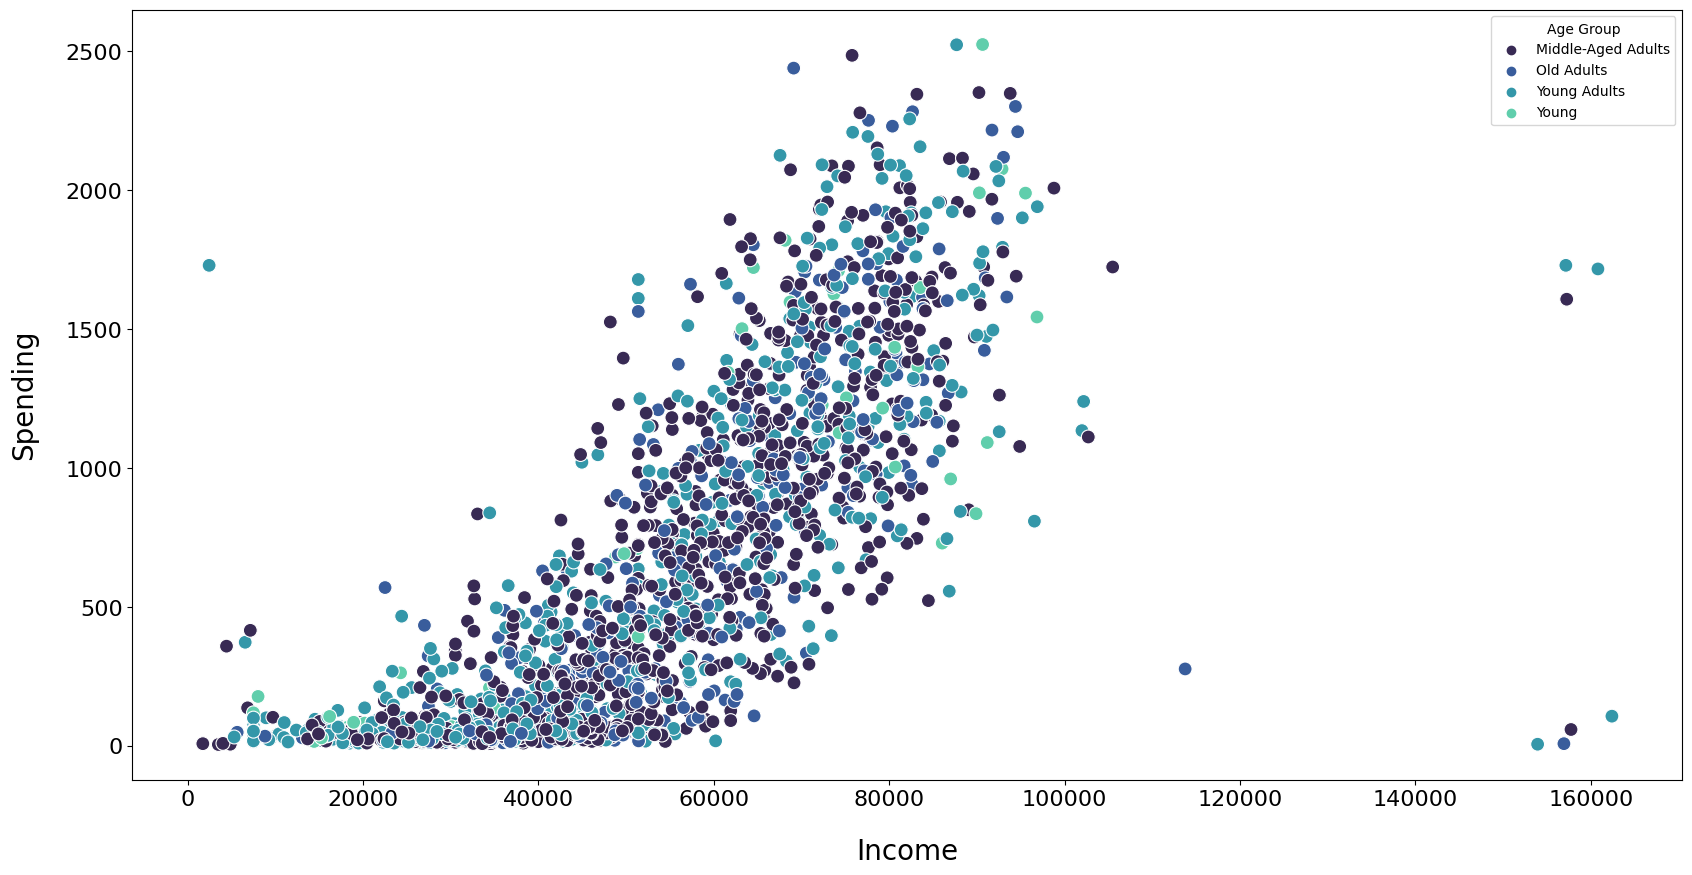

In [ ]:
plt.figure(figsize=(20,10))


sns.scatterplot(data = df, x='Income', y='Total_Spend', hue = 'Age Group', s=100, palette = 'mako')

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Spending', fontsize=20, labelpad=20)

Text(0, 0.5, 'Spending')

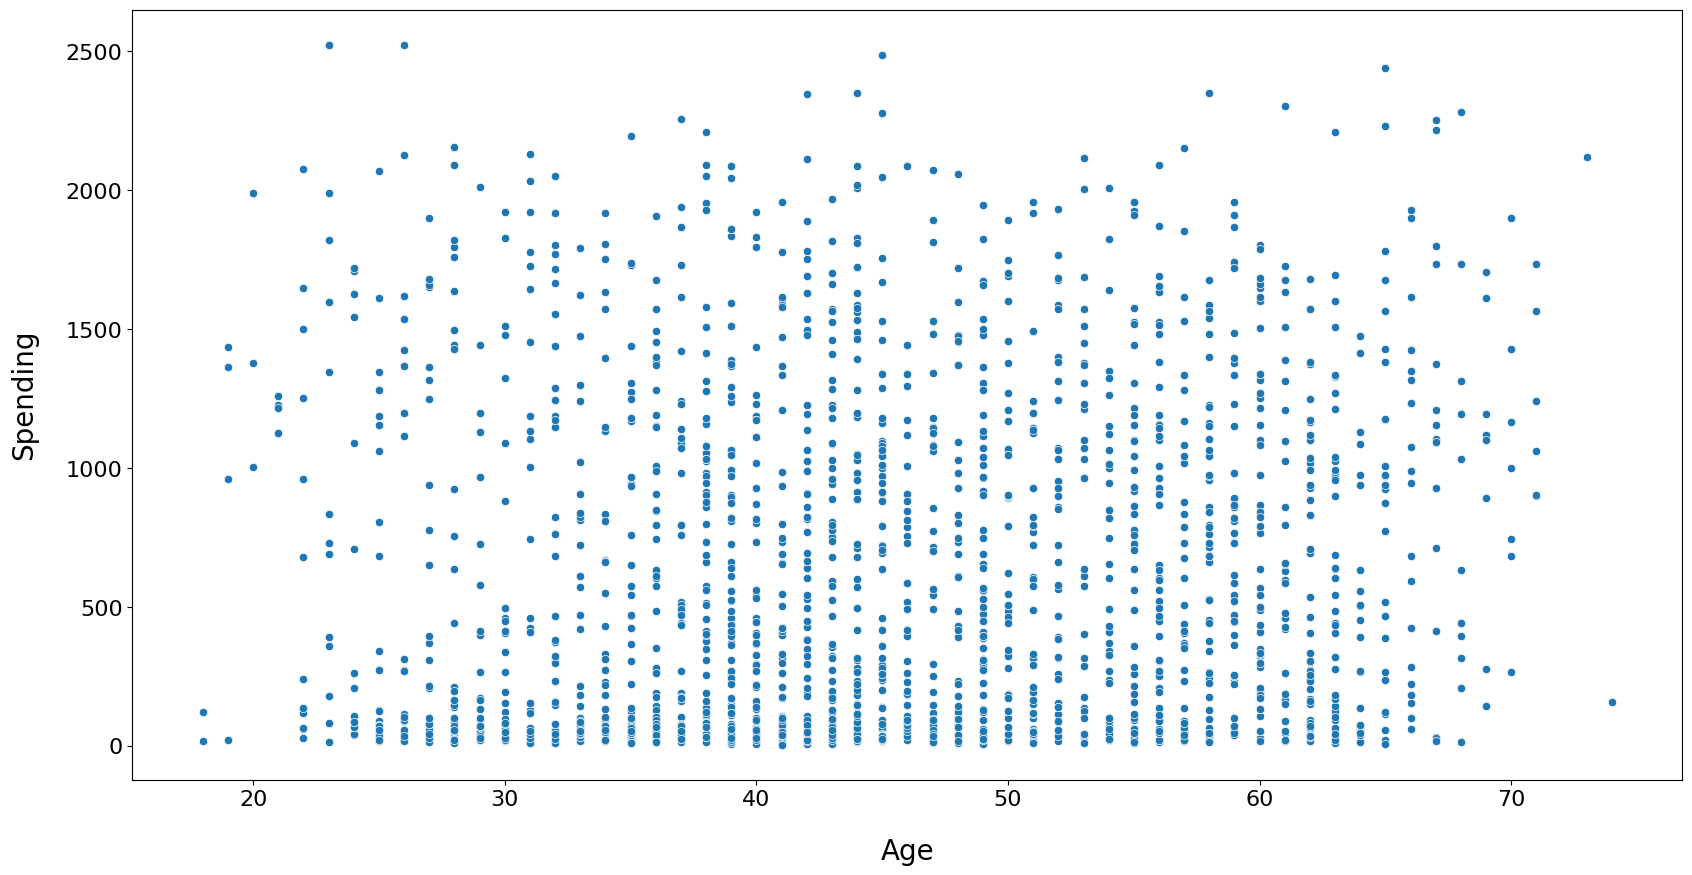

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data = df, x='Age', y='Total_Spend')

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age', fontsize=20, labelpad=20)
plt.ylabel('Spending', fontsize=20, labelpad=20)

Text(0, 0.5, 'Spending')

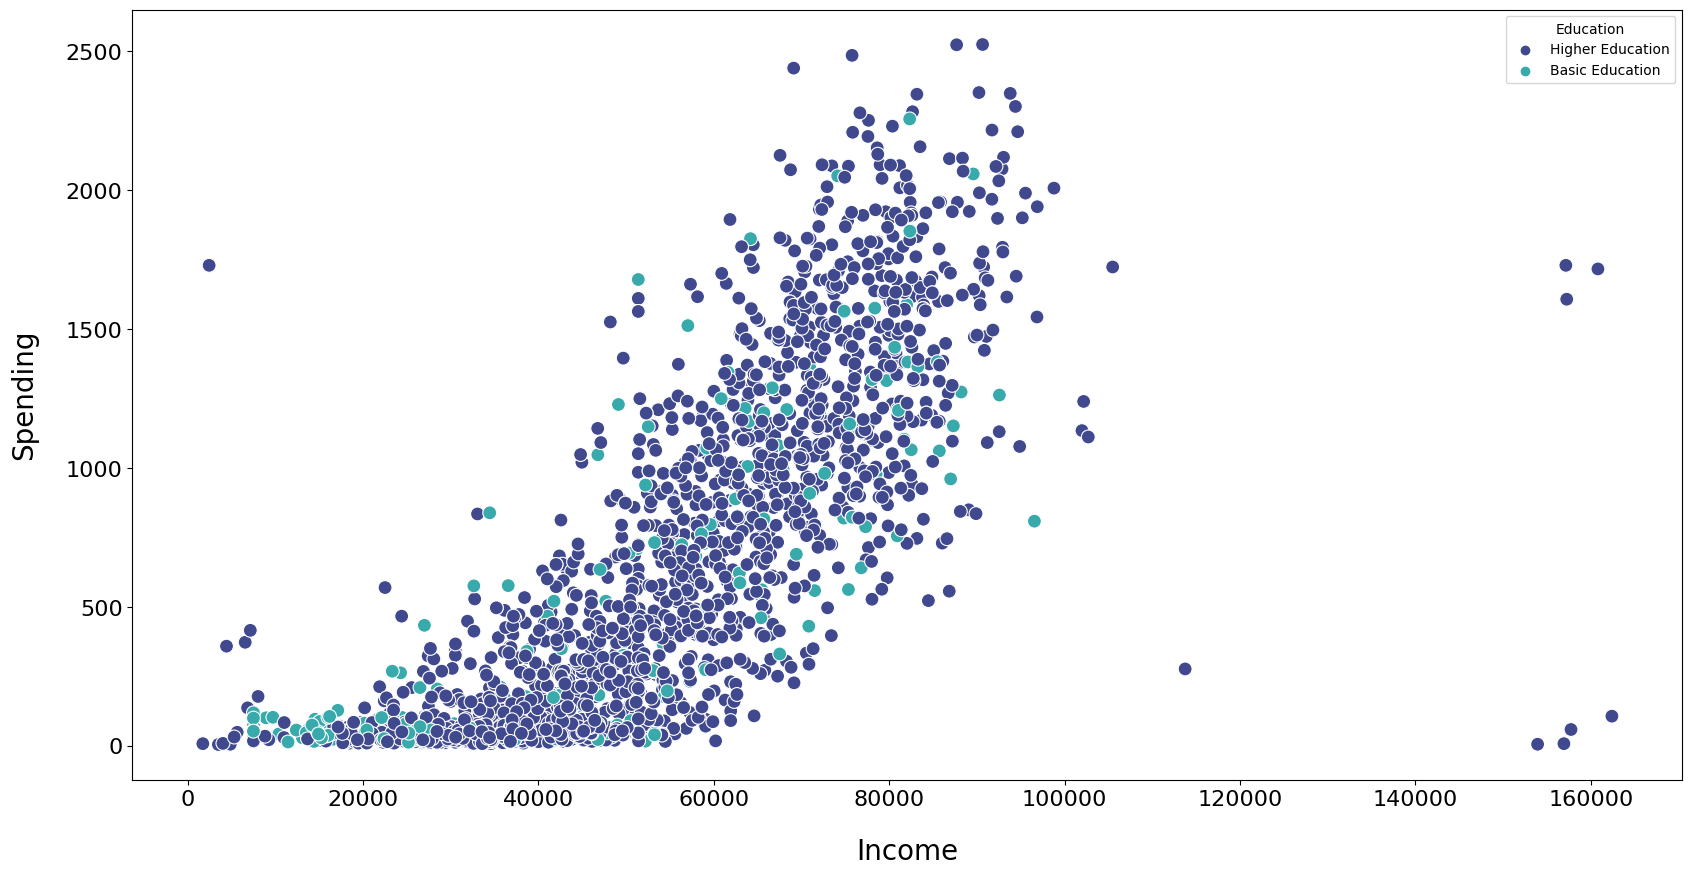

In [ ]:
plt.figure(figsize=(20,10))


sns.scatterplot(data = df, x='Income', y='Total_Spend', hue = 'Education', s=100, palette = 'mako')

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Spending', fontsize=20, labelpad=20)

<ipython-input-70-2a027b06a84a>:12: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.




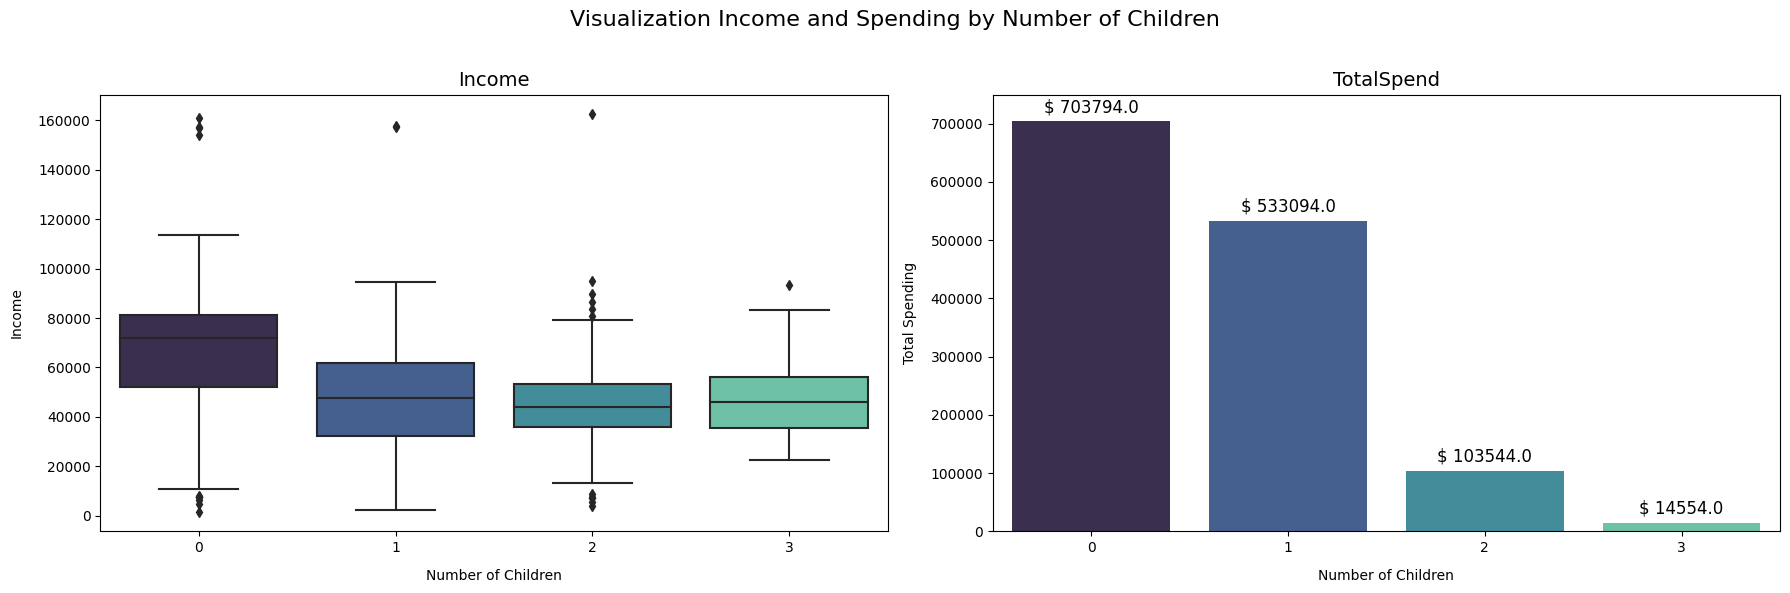

In [ ]:
fig = plt.figure(figsize=(18,6))

fig.suptitle('Visualization Income and Spending by Number of Children\n', size=16)

plt.subplot(1,2,1)
sns.boxplot(data=df, y='Income', x= 'Children', palette='mako')
plt.title('Income', size=14)
plt.xlabel('Number of Children',labelpad=10)
plt.ylabel('Income',labelpad=10)

plt.subplot(1,2,2)
a2 = sns.barplot(data=df, y='Total_Spend', x= 'Children', palette='mako', estimator=sum, ci = 0)
plt.title('TotalSpend', size=14)
plt.xlabel('Number of Children',labelpad=10)
plt.ylabel('Total Spending',labelpad=10)
plt.ylim(0,750000)
for p in a2.patches:
    a2.annotate(f'$ {p.get_height()}', (p.get_x()+0.4, p.get_height()+40000), ha='center', va='top', color='black', size=12)

plt.tight_layout()

In [ ]:
df.groupby(['Marital_Status']).sum()[['Total_Spend']]

<ipython-input-67-3ea891a6a62e>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Total_Spend
Marital_Status              
In Relationship       861403
No Relationship       493583

In [ ]:
df.groupby(['Marital_Status']).mean()[['Total_Spend']]

<ipython-input-71-46f234f75770>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Total_Spend
Marital_Status              
In Relationship   597.366852
No Relationship   621.641058

In [ ]:
df.groupby(['Marital_Status']).median()[['Income']]

<ipython-input-68-e1939abfac7d>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Income
Marital_Status           
In Relationship  51381.50
No Relationship  51315.75

<ipython-input-72-b98670028d0c>:12: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.




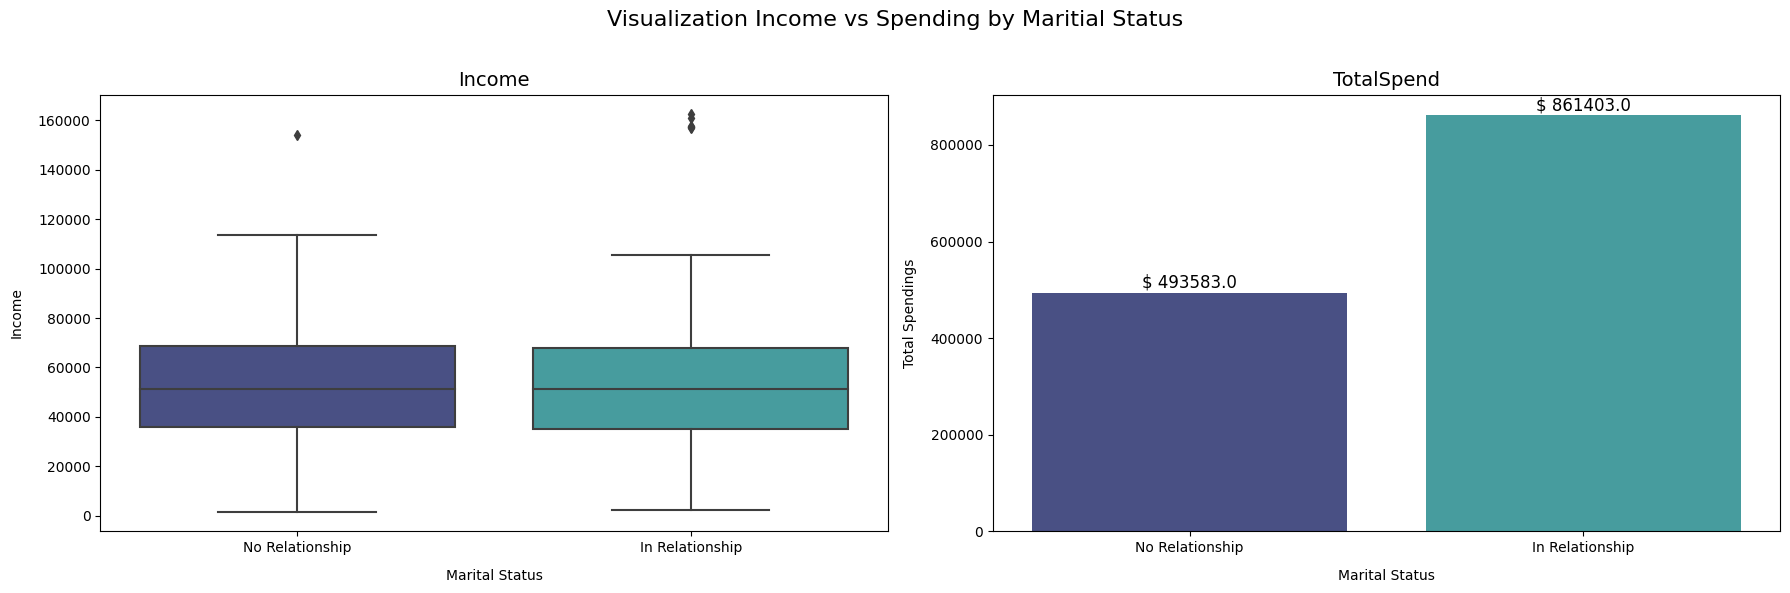

In [ ]:
fig = plt.figure(figsize=(18,6))

fig.suptitle('Visualization Income vs Spending by Maritial Status\n', size=16)

plt.subplot(1,2,1)
sns.boxplot(data=df, y='Income', x= 'Marital_Status', palette='mako')
plt.title('Income', size=14)
plt.xlabel('Marital Status',labelpad=10)
plt.ylabel('Income',labelpad=10)

plt.subplot(1,2,2)
a2 = sns.barplot(data=df, y='Total_Spend', x= 'Marital_Status', palette='mako', estimator=sum, ci = 0)
plt.title('TotalSpend', size=14)
plt.xlabel('Marital Status',labelpad=10)
plt.ylabel('Total Spendings',labelpad=10)

for p in a2.patches:
    a2.annotate(f'$ {p.get_height()}', (p.get_x()+0.4, p.get_height()+40000), ha='center', va='top', color='black', size=12)

plt.tight_layout()

<ipython-input-74-6db8669c39bd>:12: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.




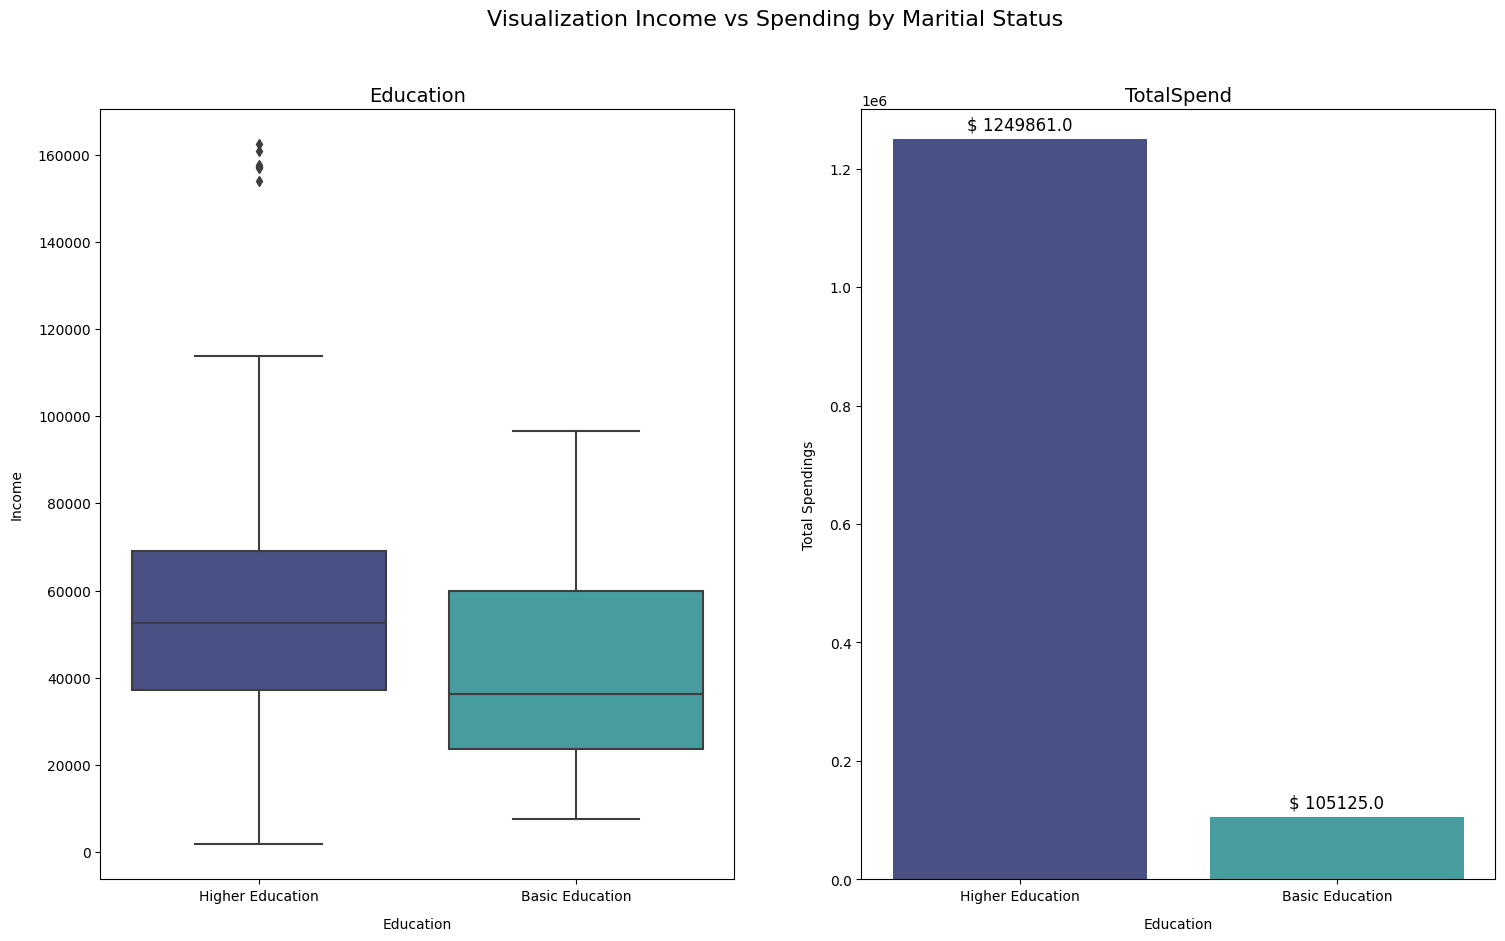

In [ ]:
fig = plt.figure(figsize=(18,10))

fig.suptitle('Visualization Income vs Spending by Maritial Status\n', size=16)

plt.subplot(1,2,1)
sns.boxplot(data=df, y='Income', x= 'Education', palette='mako')
plt.title('Education', size=14)
plt.xlabel('Еducation',labelpad=10)
plt.ylabel('Income',labelpad=10)

plt.subplot(1,2,2)
a2 = sns.barplot(data=df, y='Total_Spend', x= 'Education', palette='mako', estimator=sum, ci = 0)
plt.title('TotalSpend', size=14)
plt.xlabel('Education',labelpad=10)
plt.ylabel('Total Spendings',labelpad=10)
plt.ylim(0, 1300000)

for p in a2.patches:
    a2.annotate(f'$ {p.get_height()}', (p.get_x()+0.4, p.get_height()+40000), ha='center', va='top', color='black', size=12)

**Промоция**

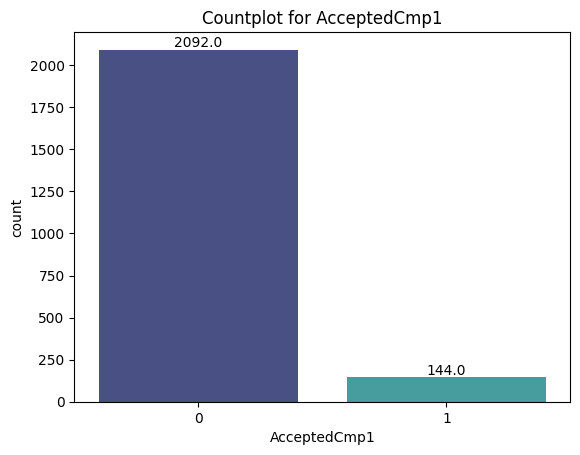

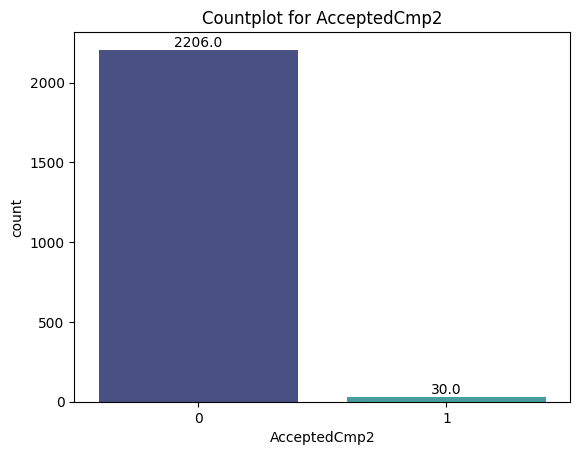

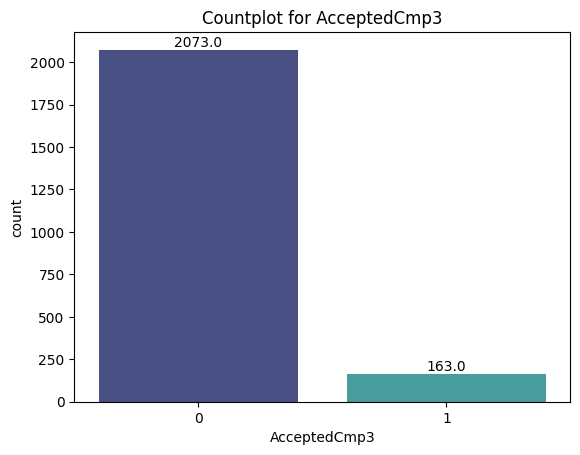

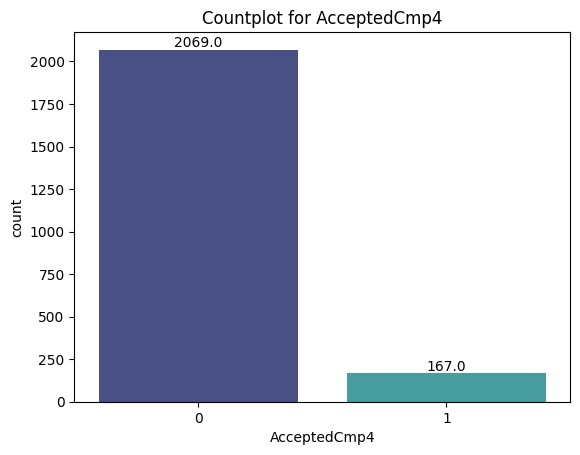

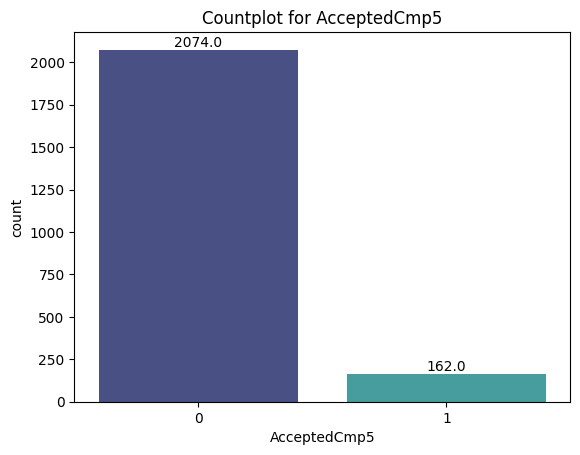

In [75]:
columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

for col in columns:
    ax = sns.countplot(data=df, x=col, palette = 'mako')

    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    plt.title(f'Countplot for {col}')
    plt.show()

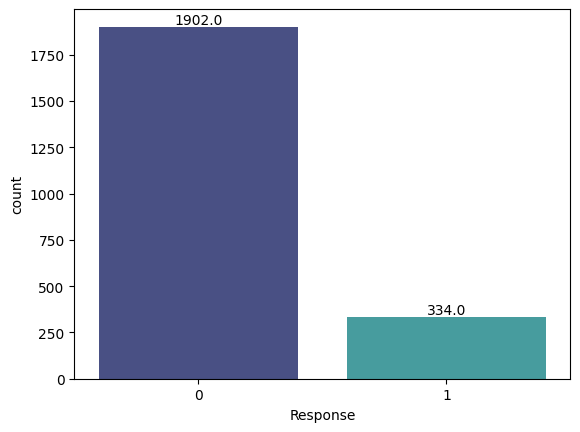

In [77]:
ax = sns.countplot(data=df, x= 'Response', palette = 'mako')
for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

<ipython-input-78-06f8e56ca854>:2: FutureWarning:

The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



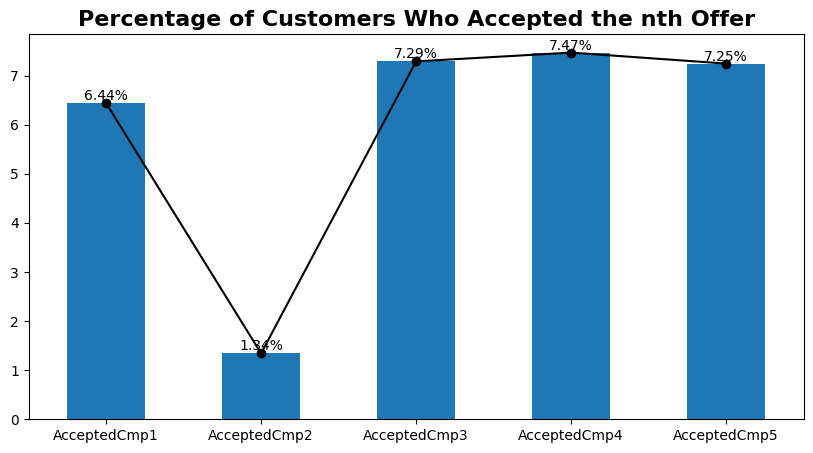

In [78]:
plt.figure(figsize=(10, 5))
percent = df.sum()[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']] * 100 / len(df)
ax = percent.plot.bar()

for i, p in enumerate(ax.patches):
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    percentage = f'{percent.iloc[i]:.2f}%'
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

percent.plot(style='o-', colormap='copper')

plt.title('Percentage of Customers Who Accepted the nth Offer', weight='bold', fontsize=16)
plt.show()

In [80]:
df['Total_Accept'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [81]:
df['Total_Accept'].value_counts()

0    1774
1     324
2      83
3      44
4      11
Name: Total_Accept, dtype: int64

Text(0, 0.5, 'Count')

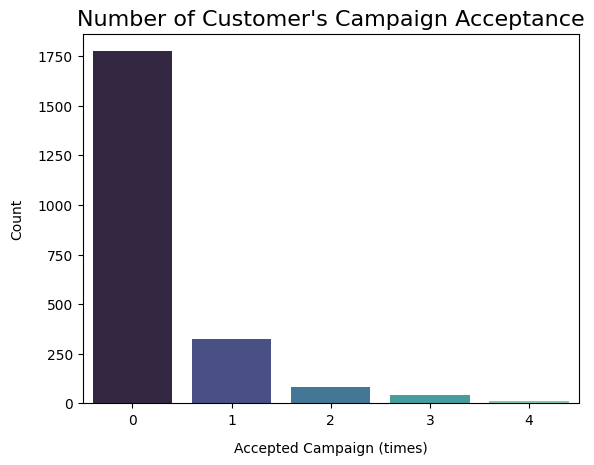

In [82]:
ax = sns.countplot(data=df, x='Total_Accept', palette='mako')
plt.title('Number of Customer\'s Campaign Acceptance',size=16)
plt.xlabel('Accepted Campaign (times)',labelpad=10)
plt.ylabel('Count',labelpad=10)

In [97]:

campaigns = df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Response']]
products = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]


participation_counts = {}


for product_col in products.columns:

    campaign_counts = {}

    for campaign_col in campaigns.columns:

        count = len(df[(df[campaign_col] == 1) & (df[product_col] > 0)])

        campaign_counts[campaign_col] = count


    participation_counts[product_col] = campaign_counts


participation_df = pd.DataFrame(participation_counts)


participation_df

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
AcceptedCmp3       162        133              163              126   
AcceptedCmp4       167        127              167              118   
AcceptedCmp5       162        151              162              145   
AcceptedCmp1       144        125              144              125   
AcceptedCmp2        30         21               30               19   
Response           334        295              334              290   

              MntSweetProducts  MntGoldProds  
AcceptedCmp3               130           163  
AcceptedCmp4               116           161  
AcceptedCmp5               150           155  
AcceptedCmp1               131           139  
AcceptedCmp2                18            29  
Response                   291           324

<Figure size 10000x1000 with 0 Axes>

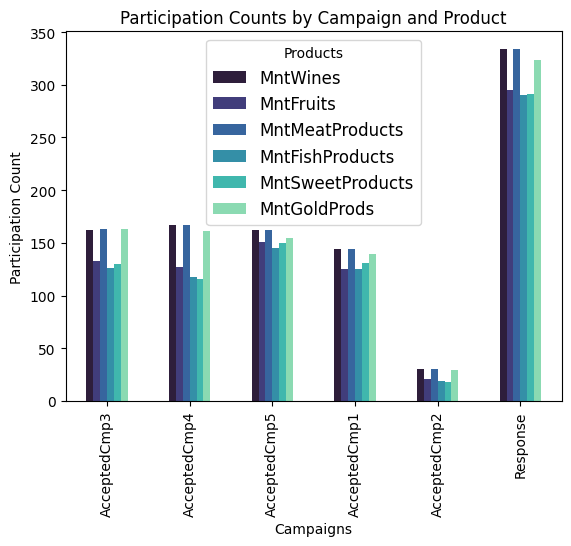

In [98]:
colors = sns.color_palette('mako', n_colors=len(participation_df.columns))
plt.figure(figsize=(100, 10))
# Plot the DataFrame as a clustered bar chart
participation_df.plot(kind='bar', color=colors)

# Set the labels and title
plt.xlabel('Campaigns')
plt.ylabel('Participation Count')
plt.title('Participation Counts by Campaign and Product')

# Set the legend with the product names
plt.legend(title='Products', labels=participation_df.columns, fontsize='large')

# Show the chart
plt.show()

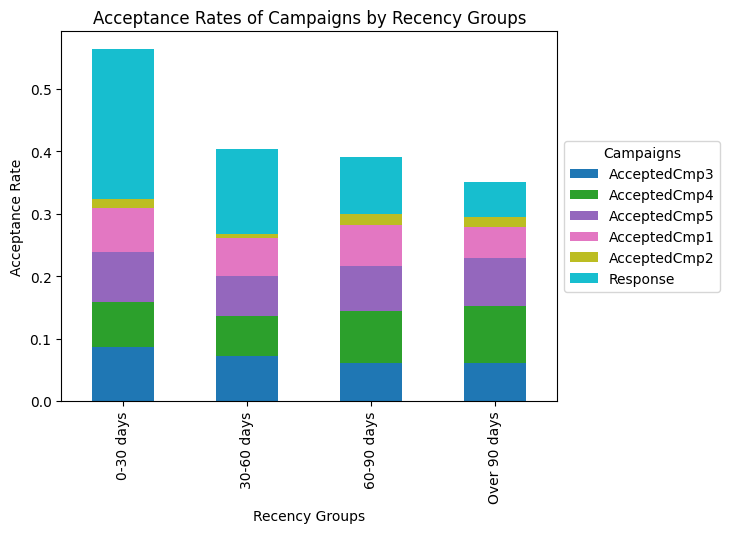

In [103]:
recency_groups = ['0-30 days', '30-60 days', '60-90 days', 'Over 90 days']


acceptance_rates = []
for group in recency_groups:

    interval_df = df[df['Recency Group'] == group]


    acceptance_rates.append(interval_df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']].mean())


acceptance_rates_df = pd.DataFrame(acceptance_rates, index=recency_groups)


ax = acceptance_rates_df.plot(kind='bar', stacked=True, cmap='tab10')

ax.set_xlabel('Recency Groups')
ax.set_ylabel('Acceptance Rate')
ax.set_title('Acceptance Rates of Campaigns by Recency Groups')


ax.legend(title='Campaigns', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

<ipython-input-105-c07d738ef49b>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



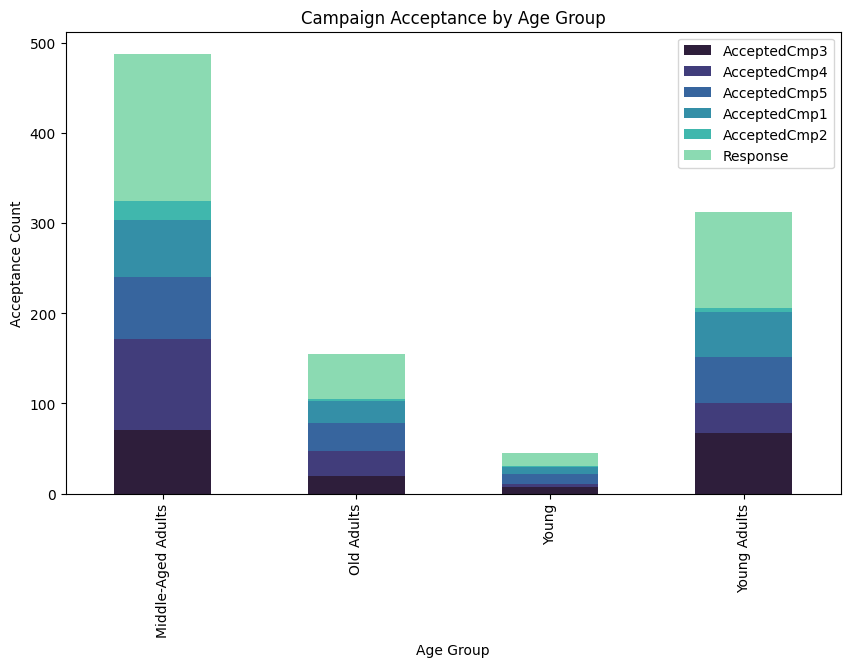

In [105]:
# Grouping the data by age group and calculating the acceptance counts for each campaign
age_group_acceptances = df.groupby('Age Group')['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response'].sum()

# Plotting the stacked bar chart
colors = sns.color_palette('mako', n_colors=len(age_group_acceptances.columns))
age_group_acceptances.plot(kind='bar', stacked=True, color = colors,figsize=(10, 6))
plt.xlabel('Age Group')
plt.ylabel('Acceptance Count')
plt.title('Campaign Acceptance by Age Group')
plt.legend(loc='upper right')

plt.show()